In [1]:
# %load basic_example_F.py
import src.core as mlApi

Using TensorFlow backend.


In [2]:
# 1. Define dataset specifics

# File path to dataset .csv file
filename = "../master-thesis-db/datasets/F/data_30min.csv"

# List of columns on form ['name', 'desc', 'unit']
columns = [
    ['FYN0111', 'Process Flow Rate', 'MSm^3/day'],
    ['FT0111', 'Process Flow Molecular Weight','g/mole'],
    ['TT0102_MA_Y', 'Process Inlet Temperature A', 'Degrees'],
    ['TIC0101_CA_YX', 'Process Outlet Temperature A', 'Degrees'],
    ['TT0104_MA_Y', 'Process Inlet Temperature B', 'Degrees'],
    ['TIC0103_CA_YX', 'Process Outlet Temperature B', 'Degrees'],
    ['TT0106_MA_Y', 'Process Inlet Temperature C', 'Degrees'],
    ['TIC0105_CA_YX', 'Process Outlet Temperature C', 'Degrees'],
    ['TI0115_MA_Y', 'Scrubber Outlet Temperature', 'Degrees'],
    ['PDT0108_MA_Y', 'Process A Pressure Difference', 'Bar'],
    ['PDT0119_MA_Y', 'Process B Pressure Difference', 'Bar'],
    ['PDT0118_MA_Y', 'Process C Pressure Difference', 'Bar'],
    ['PIC0104_CA_YX', 'Separator Inlet Pressure', 'Bar'],
    ['TIC0425_CA_YX', 'Coolant Inlet Temperature', 'Degrees'],
    ['TT0651_MA_Y', 'Coolant Outlet Temperature A', 'Degrees'],
    ['TT0652_MA_Y', 'Coolant Outlet Temperature B', 'Degrees'],
    ['TT0653_MA_Y', 'Coolant Outlet Temperature C', 'Degrees'],
    ['TIC0101_CA_Y', 'Coolant Valve Opening A', '%'],
    ['TIC0103_CA_Y', 'Coolant Valve Opening B', '%'],
    ['TIC0105_CA_Y', 'Coolant Valve Opening C', '%'],
]

# List of column names to ignore completely
irrelevantColumns = [
		'FT0111',
		'PDT0108_MA_Y',
		'PDT0119_MA_Y',
		'PDT0118_MA_Y',
		'TT0104_MA_Y',
		'TIC0103_CA_YX',
		'TI0115_MA_Y',
		'TT0652_MA_Y',
		'TIC0103_CA_Y',
		'PIC0104_CA_YX',
		'TIC0101_CA_Y',
		'TT0102_MA_Y',
		'TIC0101_CA_YX',
		'TT0651_MA_Y',
		#'TIC0105_CA_Y',
]

# List of column names used a targets
targetColumns = [
	'TT0653_MA_Y',
]


# List of training periods on form ['start', 'end']
traintime = [
	["2018-01-01 00:00:00", "2018-08-01 00:00:00"],
]

# Testing period, recommended: entire dataset
testtime = [
    "2018-01-01 00:00:00",
    "2019-05-01 00:00:00"
]

In [3]:
# 2. Initiate and divide data

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

In [4]:
# 3. Define models

mlpd_1x_128 = mlApi.MLP('mlpd 1x 128', layers=[128], dropout=0.2)
lstmd_1x_128 = mlApi.LSTM('lstmd 1x 128', layers=[128], dropout=0.2, recurrentDropout=0.2, enrolWindow=16)
mlpd_2x_64 = mlApi.MLP('mlpd 2x 64', layers=[64, 64], dropout=0.2)
lstmd_2x_64 = mlApi.LSTM('lstmd 2x 64', layers=[64, 64], dropout=0.2, recurrentDropout=0.2, enrolWindow=16)
linear_r = mlApi.Linear_Regularized('linear r')
ensemble1 = mlApi.Ensemble('mlp2 + linear ensemble', [mlpd_2x_64, linear_r])
ensemble2 = mlApi.Ensemble('lstm2 + mlp2 ensemble', [mlpd_2x_64, lstmd_2x_64])

modelList = [
    mlpd_1x_128,
    lstmd_1x_128,
	mlpd_2x_64,
	lstmd_2x_64,
    ensemble1,
    ensemble2,
	linear_r,
]

Model mlpd 1x 128 was loaded from file
Model lstmd 1x 128 was loaded from file
Model mlpd 2x 64 was loaded from file
Model lstmd 2x 64 was loaded from file
Model mlp2 + linear ensemble was loaded from file
Training submodel linear r of Ensemble mlp2 + linear ensemble
    Trained weights for linear r:
    [[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
    Trained weights for Linear model of ensemble:
    [[0.87260961 0.0661578 ]]
Model lstm2 + mlp2 ensemble was loaded from file
Model lstm2 + mlp2 ensemble was loaded from file
    Trained weights for Linear model of ensemble:
    [[0.25645986 0.7343184 ]]
Training model linear r
    Trained weights for linear r:
    [[ 0.51770724  0.35863995  0.17792243  0.00887577 -0.97750831]]
+--------------+-----------+-------------+---------------+--------+
|    Model     | Min. loss | Chosen loss | Min. val loss | Epochs |
+--------------+-----------+-------------+---------------+--------+
| mlpd 1x 128  |  0.151334 |   0.173133  |

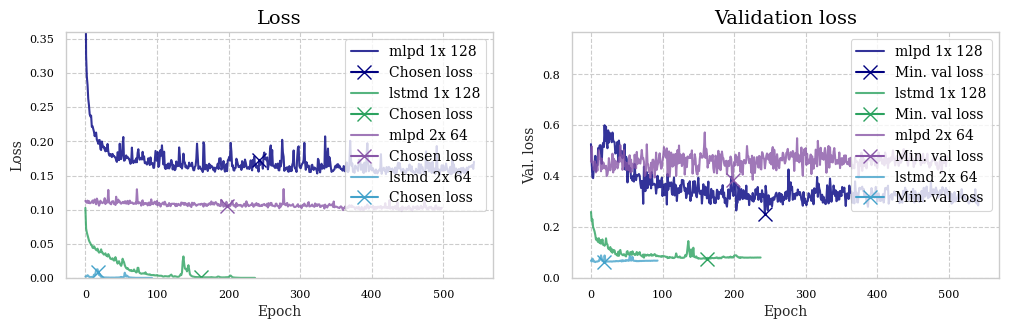

In [5]:
# 4. Initiate and train models

# Define whether to retrain models or not
retrain=False

mlApi.initModels(modelList)
mlApi.trainModels(retrain)

Model prediction scores
+------------------------+-------------+------------+
|         Model          | Train score | Test score |
+------------------------+-------------+------------+
|      mlpd 1x 128       |    0.8302   |  -1.2265   |
|      lstmd 1x 128      |    0.9296   |  -0.2001   |
|       mlpd 2x 64       |    0.8523   |   0.346    |
|      lstmd 2x 64       |    0.9373   |  -0.3672   |
| mlp2 + linear ensemble |    0.8609   |   0.3726   |
| lstm2 + mlp2 ensemble  |    0.9489   |  -0.0791   |
|        linear r        |    0.6158   |   0.5949   |
+------------------------+-------------+------------+


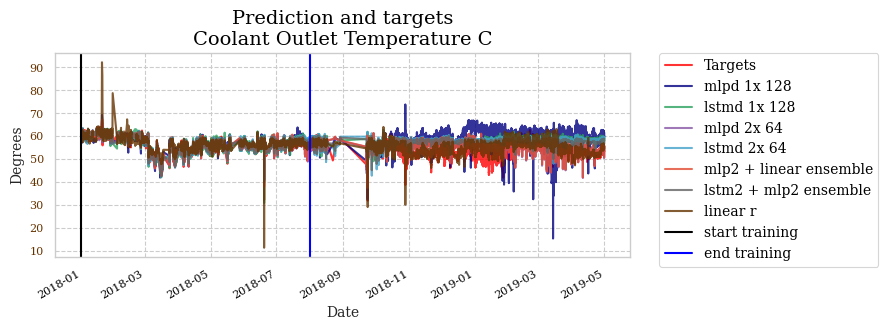

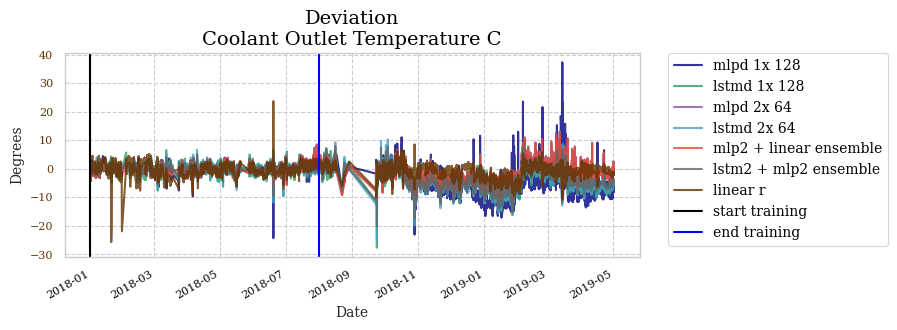

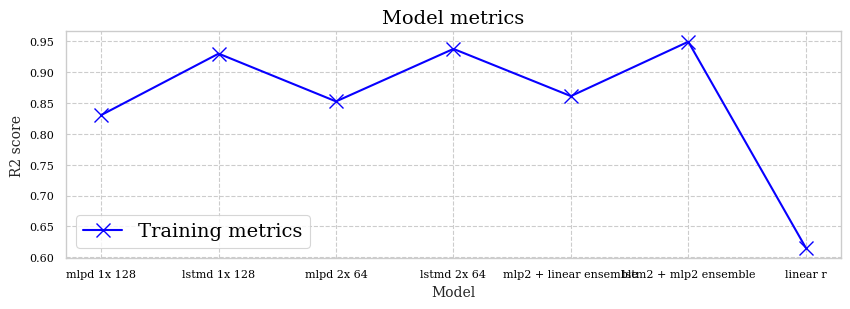

In [6]:
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
	score=True,
)

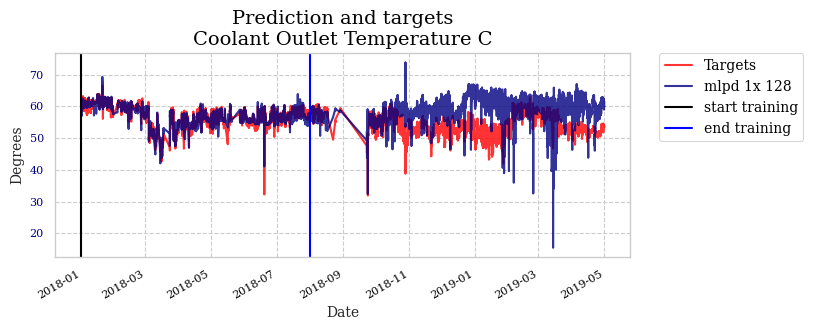

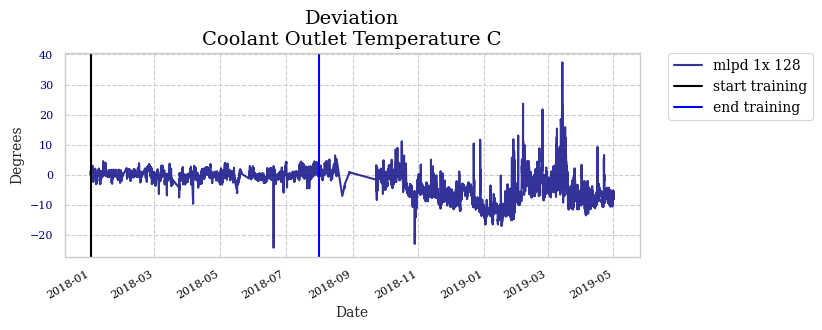

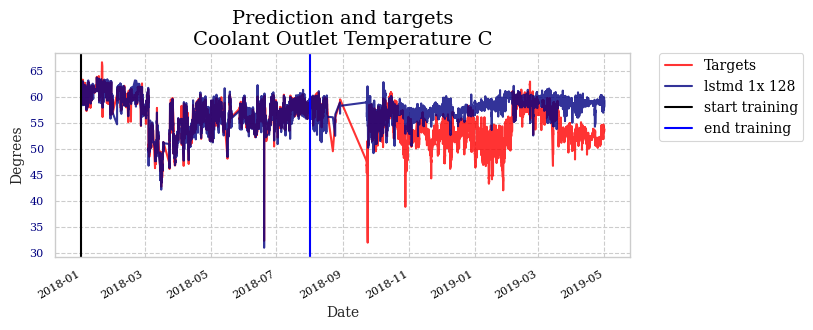

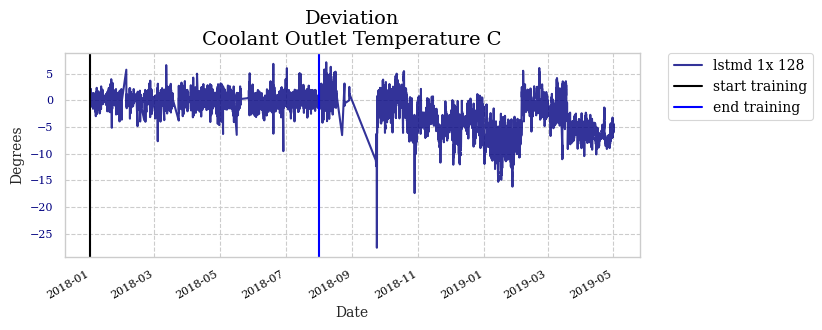

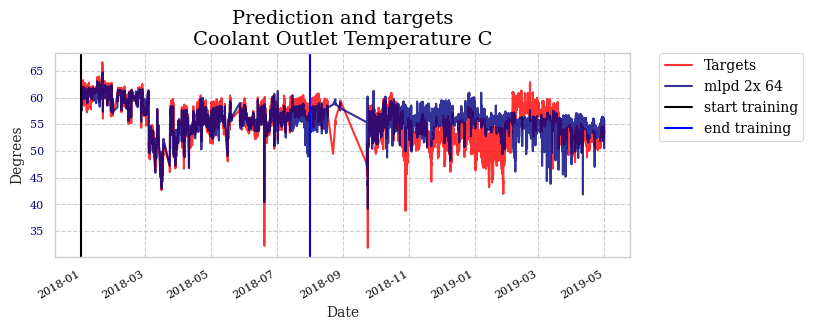

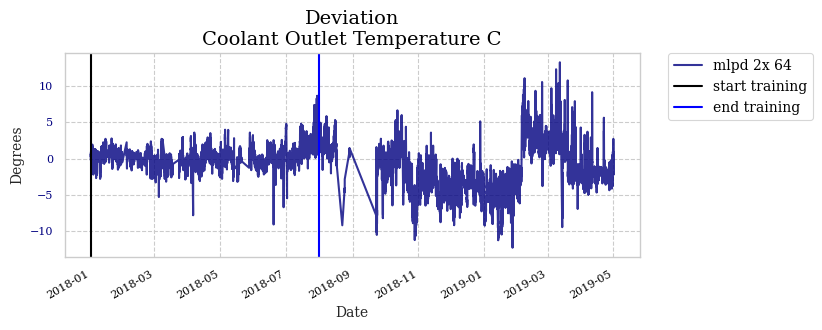

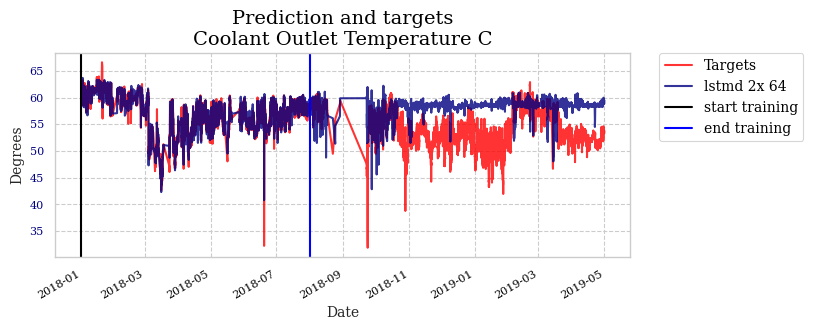

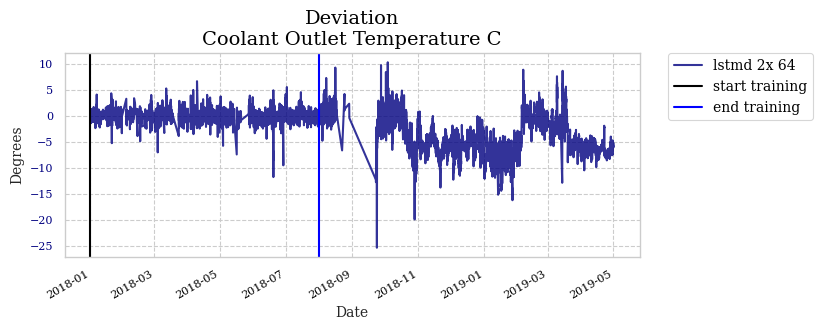

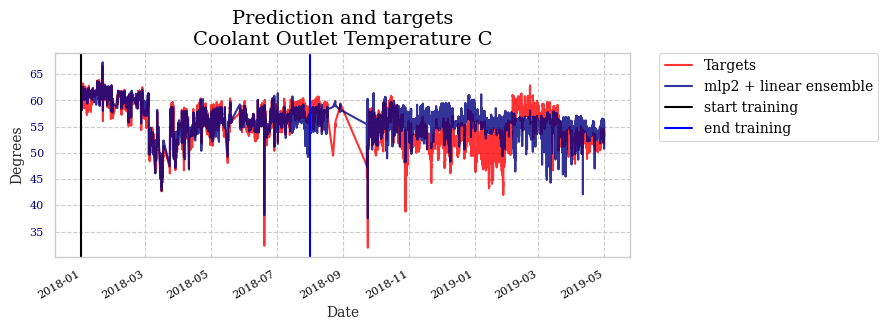

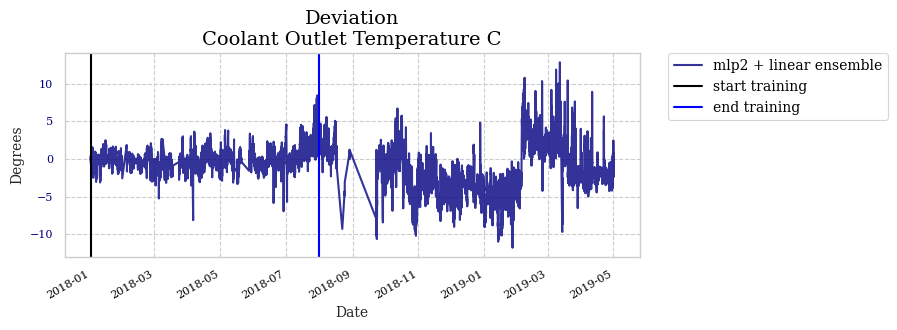

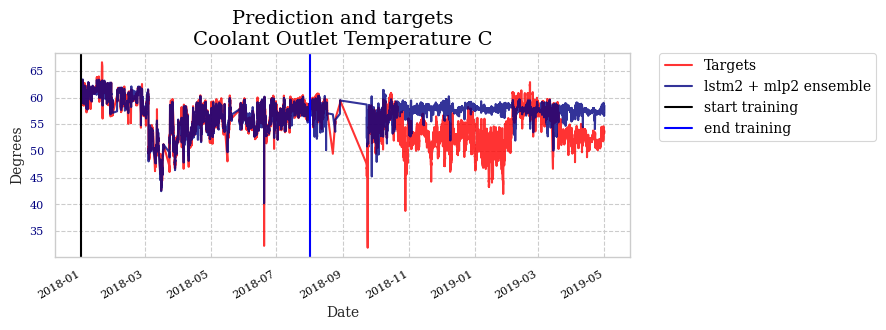

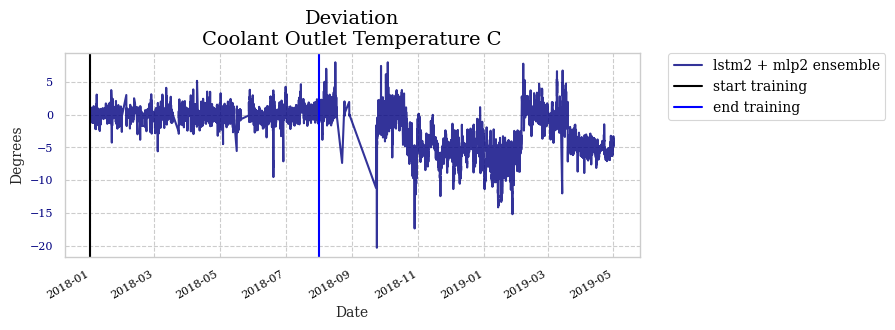

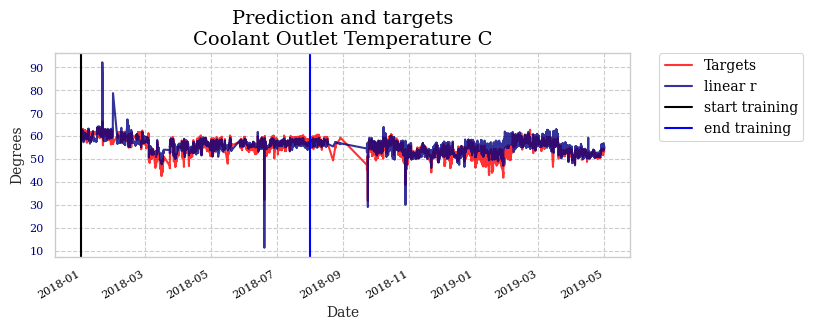

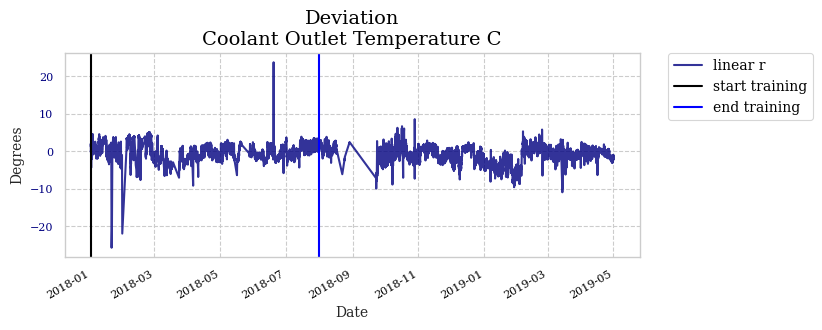

In [7]:
for model in modelList:
    mlApi.initModels([model])
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=True,
        interpol=False,
        score=False,
    )